In [214]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sc_lineage_data_UU = pd.read_csv('SKMEL5-undiversified-untreated_scRNAseq-Lineage-Transcript-Cell-UMI.csv')

/Users/Corey/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sc_lineage_data_UT = pd.read_csv('SKMEL5-undiversified-treated_scRNAseq-Lineage-Transcript-Cell-UMI.csv')

In [4]:
sc_lineage_data_UU_dropna = sc_lineage_data_UU.dropna(subset=['Barcode'])
sc_lineage_data_UT_dropna = sc_lineage_data_UT.dropna(subset=['Barcode'])

In [5]:
# Remove rows where the lineage barcode is not between 17 and 23 nt long (supposed to be 20nt)
sc_lineage_data_UU_dropna['Barcode'] = sc_lineage_data_UU_dropna['Barcode'].astype('str')
mask = (sc_lineage_data_UU_dropna['Barcode'].str.len() >= 17) & (sc_lineage_data_UU_dropna['Barcode'].str.len() <= 23)
sc_lineage_data_UU_dropna_correctbc = sc_lineage_data_UU_dropna.loc[mask]

# Remove rows where the lineage barcode is not between 17 and 23 nt long (supposed to be 20nt)
sc_lineage_data_UT_dropna['Barcode'] = sc_lineage_data_UT_dropna['Barcode'].astype('str')
mask = (sc_lineage_data_UT_dropna['Barcode'].str.len() >= 17) & (sc_lineage_data_UT_dropna['Barcode'].str.len() <= 23)
sc_lineage_data_UT_dropna_correctbc = sc_lineage_data_UT_dropna.loc[mask]

/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
bc_values_UU = sc_lineage_data_UU_dropna_correctbc.ix[:,1:5]
sc_values_UU = sc_lineage_data_UU_dropna_correctbc.ix[:,5:]

bc_values_UT = sc_lineage_data_UT_dropna_correctbc.ix[:,1:5]
sc_values_UT = sc_lineage_data_UT_dropna_correctbc.ix[:,5:]

/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [7]:
## Data Cleaning - using suggested thresholds from ScanPy ##
# Filter out cells with less than 200 genes
nonzeroes_in_cols_UU = sc_lineage_data_UU_dropna_correctbc.astype(bool).sum(axis=1)
# nonzeroes_in_cols
sum(i > 200 for i in nonzeroes_in_cols_UU)
cell_norm_ind_UU = nonzeroes_in_cols_UU.index[nonzeroes_in_cols_UU > 200].tolist()
sc_cellnorm_UU = sc_lineage_data_UU_dropna_correctbc.ix[cell_norm_ind_UU]
sc_cellnorm_UU = sc_cellnorm_UU.ix[:,1:]

## Data Cleaning - using suggested thresholds from ScanPy ##
# Filter out cells with less than 200 genes
nonzeroes_in_cols_UT = sc_lineage_data_UT_dropna_correctbc.astype(bool).sum(axis=1)
# nonzeroes_in_cols
sum(i > 200 for i in nonzeroes_in_cols_UT)
cell_norm_ind_UT = nonzeroes_in_cols_UT.index[nonzeroes_in_cols_UT > 200].tolist()
sc_cellnorm_UT = sc_lineage_data_UT_dropna_correctbc.ix[cell_norm_ind_UT]
sc_cellnorm_UT = sc_cellnorm_UT.ix[:,1:]

/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [9]:
# Filter out genes with less than 3 cells
nonzeroes_in_rows_UU = sc_cellnorm_UU.astype(bool).sum(axis=0)
sum(i > 3 for i in nonzeroes_in_rows_UU)
gene_norm_ind_UU = nonzeroes_in_rows_UU.index[nonzeroes_in_rows_UU > 3].tolist()
sc_cellgenenorm_UU = sc_cellnorm_UU[gene_norm_ind_UU]

# Filter out genes with less than 3 cells
nonzeroes_in_rows_UT = sc_cellnorm_UT.astype(bool).sum(axis=0)
sum(i > 3 for i in nonzeroes_in_rows_UT)
gene_norm_ind_UT = nonzeroes_in_rows_UT.index[nonzeroes_in_rows_UT > 3].tolist()
sc_cellgenenorm_UT = sc_cellnorm_UT[gene_norm_ind_UT]

In [13]:
sc_cellgenenorm_UU.head()
# sc_cellgenenorm_UT.shape

,Transcript ID,Barcode,Cell Barcode,UMI,WASH7P,LOC729737,LOC100288069,FAM87B,LINC00115,LINC01128,...,FUNDC2,CMC4,MTCP1,BRCC3,VBP1,RAB39B,CLIC2,TMLHE,SPRY3,VAMP7
0,A00252:38:HF2JNDMXX:2:1101:7337:1329,CTGACTGTCAGACAGAGTGA,TTAACTCAGCTATGCT,TCCTATCCTT,0,0,0,0,0,1,...,6,2,0,0,2,0,0,1,0,0
1,A00252:38:HF2JNDMXX:2:1101:29116:1438,CTGACAGTGTCACACAGTGA,CGACTTCAGCCAGAAC,TTCCGTCGAA,0,0,0,0,0,0,...,1,0,0,0,2,0,0,0,0,0
2,A00252:38:HF2JNDMXX:2:1101:17707:1470,CTGAGTCAGTCACACTCTGT,GTGTGCGGTCCTAGCG,ATTCGTTGAA,0,0,0,0,0,0,...,5,0,0,0,2,0,0,1,0,0
3,A00252:38:HF2JNDMXX:2:1101:21404:2143,CTGACAGTCAGTCAGTGTGA,CGTGTAATCGGTTAAC,TACACTCTAC,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A00252:38:HF2JNDMXX:2:1101:7545:2503,CTGAGAGACTCTGTGACTGA,CATTCGCAGGGAACGG,TACCTGCTTG,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
## Data normalization - see powerpoint for detailed explanation ##
import numpy as np
from numpy import inf

totGE_percell_UU = sc_cellgenenorm_UU.ix[:,4:].sum(axis = 1)
totGE_percell_norm_UU = sc_cellgenenorm_UU.ix[:,4:].div(totGE_percell_UU, axis=0)
totGE_percell_norm_scaled_UU = totGE_percell_norm_UU * 100000 #len(totGE_percell_norm.index)
totGE_percell_norm_scaled_log_UU = np.log(totGE_percell_norm_scaled_UU.astype(float))
totGE_percell_norm_scaled_log_noInf_UU = totGE_percell_norm_scaled_log_UU.replace([np.inf, -np.inf], 0)

totGE_percell_UT = sc_cellgenenorm_UT.ix[:,4:].sum(axis = 1)
totGE_percell_norm_UT = sc_cellgenenorm_UT.ix[:,4:].div(totGE_percell_UT, axis=0)
totGE_percell_norm_scaled_UT = totGE_percell_norm_UT * 100000 #len(totGE_percell_norm.index)
totGE_percell_norm_scaled_log_UT = np.log(totGE_percell_norm_scaled_UT.astype(float))
totGE_percell_norm_scaled_log_noInf_UT = totGE_percell_norm_scaled_log_UT.replace([np.inf, -np.inf], 0)

/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


In [15]:
sc_data_UU_norm = pd.concat([sc_cellgenenorm_UU.ix[:,:4], totGE_percell_norm_scaled_log_noInf_UU], axis = 1)
sc_data_UT_norm = pd.concat([sc_cellgenenorm_UT.ix[:,:4], totGE_percell_norm_scaled_log_noInf_UT], axis = 1)

In [235]:
sc_data_UU_norm.head()
# sc_data_UT_norm.head()


,Transcript ID,Barcode,Cell Barcode,UMI,WASH7P,LOC729737,LOC100288069,FAM87B,LINC00115,LINC01128,...,FUNDC2,CMC4,MTCP1,BRCC3,VBP1,RAB39B,CLIC2,TMLHE,SPRY3,VAMP7
0,A00252:38:HF2JNDMXX:2:1101:7337:1329,CTGACTGTCAGACAGAGTGA,TTAACTCAGCTATGCT,TCCTATCCTT,0.0,0.0,0.0,0.0,0.0,0.842065,...,2.633824,1.535212,0.0,0.0,1.535212,0.0,0.0,0.842065,0.0,0.0
1,A00252:38:HF2JNDMXX:2:1101:29116:1438,CTGACAGTGTCACACAGTGA,CGACTTCAGCCAGAAC,TTCCGTCGAA,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.143788,0.000000,0.0,0.0,2.836935,0.0,0.0,0.000000,0.0,0.0
2,A00252:38:HF2JNDMXX:2:1101:17707:1470,CTGAGTCAGTCACACTCTGT,GTGTGCGGTCCTAGCG,ATTCGTTGAA,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.229093,0.000000,0.0,0.0,1.312802,0.0,0.0,0.619655,0.0,0.0
3,A00252:38:HF2JNDMXX:2:1101:21404:2143,CTGACAGTCAGTCAGTGTGA,CGTGTAATCGGTTAAC,TACACTCTAC,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,A00252:38:HF2JNDMXX:2:1101:7545:2503,CTGAGAGACTCTGTGACTGA,CATTCGCAGGGAACGG,TACCTGCTTG,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,1.631377,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [236]:
sc_data_UU_norm.to_csv('sc_data_UU_norm.csv')

In [237]:
sc_data_UT_norm.to_csv('sc_data_UT_norm.csv')

In [19]:
### GETTING SPECIAL LINEAGES ###
UU_bcCounts = pd.read_csv('UU_bcCounts.csv', header = None)
UU_bcCounts.columns = ['Barcode_UU', 'Count_UU']
UT_bcCounts = pd.read_csv('UT_bcCounts.csv', header = None)
UT_bcCounts.columns = ['Barcode_UT', 'Count_UT']

bcCountCompare = UU_bcCounts.merge(UT_bcCounts, left_on='Barcode_UU', right_on='Barcode_UT', how='outer')

test = bcCountCompare.drop('Barcode_UT', axis = 1)
test.columns = ['Barcode', 'Untreated', 'Treated']
test1 = test.dropna()

test1['Untreated_Prop'] = test1['Untreated'] /  test1['Untreated'].sum()
test1['Treated_Prop'] = test1['Treated'] /  test1['Treated'].sum()

prop_df = test1[['Barcode', 'Untreated_Prop', 'Treated_Prop']]
# prop_df['Prop_Diff'] = prop_df['Treated_Prop'] - prop_df['Untreated_Prop']
prop_df['Perc_Change_UtoT'] = ((prop_df['Treated_Prop'] - prop_df['Untreated_Prop']) / prop_df['Untreated_Prop']) * 100.0
prop_df['Perc_Change_TtoU'] = abs((prop_df['Untreated_Prop'] - prop_df['Treated_Prop']) / prop_df['Treated_Prop']) * 100.0

prop_df['Fold_Change'] = (prop_df['Treated_Prop'] / prop_df['Untreated_Prop'])

def condition(value):
    if value < 1:
        return (-1/value)
    else:
        return value

prop_df['Fold_Change'] = prop_df['Fold_Change'].apply(condition)
    
prop_df_sorted = prop_df.sort_values(by = 'Fold_Change', ascending = False)
prop_df_sorted = prop_df_sorted[['Barcode', 'Untreated_Prop', 'Treated_Prop', 'Fold_Change']]
four_fold_change = prop_df_sorted[(prop_df_sorted['Fold_Change'] > 4) | (prop_df_sorted['Fold_Change'] < -4)]
# four_fold_change
four_fold_change_list = four_fold_change['Barcode'].tolist()
four_fold_change_list

/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

['CTGAGACTCAGTGACTCACT',
 'CTGAGTGACTGAGTCACACT',
 'CTGAGACTGTGACAGACTCA',
 'CTGACTGAGAGTGACACTGA',
 'CTGACACTGAGTCTCAGTGT',
 'CTGACAGAGTGTGACAGAGA',
 'CTGACTCAGAGTCACAGACT',
 'CTGAGACAGTGTGTGAGACA',
 'CTGACAGACAGAGTGTCTGT',
 'CTGAGTCAGTGAGTCACACT',
 'CTGAGACAGTGACTGACAGA',
 'CTGAGTGTGACTCACTCTCT',
 'CTGAGAGAGAGTCACTGAGT',
 'CTGAGTGAGTCACTCTCTGT']

In [118]:
sc_data_UU_norm_reindex = sc_data_UU_norm.reset_index(drop=True)
sc_data_UT_norm_reindex = sc_data_UT_norm.reset_index(drop=True)

In [119]:
from sklearn.decomposition import PCA
# Principal Component Analysis (PCA) of whole normalized dataset
norm_pca_UU = PCA(n_components=2)
norm_sc_values_r_UU = norm_pca_UU.fit(sc_data_UU_norm_reindex.iloc[:,4:])
norm_sc_values_r_transform_UU = norm_pca_UU.fit(sc_data_UU_norm_reindex.iloc[:,4:]).transform(sc_data_UU_norm_reindex.iloc[:,4:])

norm_pca_UT = PCA(n_components=2)
norm_sc_values_r_UT = norm_pca_UT.fit(sc_data_UT_norm_reindex.iloc[:,4:])
norm_sc_values_r_transform_UT = norm_pca_UT.fit(sc_data_UT_norm_reindex.iloc[:,4:]).transform(sc_data_UT_norm_reindex.iloc[:,4:])

In [120]:
# Getting number of colors the length of unique barcodes
from random import randint
colors = []
lw = 2

for i in range(len(four_fold_change_list)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
colors

['#1F6BB6',
 '#C244E8',
 '#196E61',
 '#3C4032',
 '#60FAAA',
 '#FD9CA4',
 '#352130',
 '#B422FB',
 '#74E9C4',
 '#E5D2B2',
 '#B315CF',
 '#1F43D6',
 '#652B03',
 '#DCB522']

In [128]:
# Indexing barcodes so that you can color them on plot
norm_bc_names_UU = sc_data_UU_norm_reindex['Barcode']
norm_bc_names_UU_fourfold = norm_bc_names_UU[norm_bc_names_UU.isin(four_fold_change_list)]
norm_bc_names_fourfold_indexed_UU = norm_bc_names_UU_fourfold.astype('category')
norm_bc_names_fourfold_numindexed_UU = norm_bc_names_fourfold_indexed_UU.cat.codes
# norm_bc_names_fourfold_numindexed_UU

# Indexing barcodes so that you can color them on plot
norm_bc_names_UT = sc_data_UT_norm_reindex['Barcode']
norm_bc_names_UT_fourfold = norm_bc_names_UT[norm_bc_names_UT.isin(four_fold_change_list)]
norm_bc_names_fourfold_indexed_UT = norm_bc_names_UT_fourfold.astype('category')
norm_bc_names_fourfold_numindexed_UT = norm_bc_names_fourfold_indexed_UT.cat.codes
# norm_bc_names_fourfold_numindexed_UT

In [129]:
norm_sc_values_r_transform_fourfold_UU = norm_sc_values_r_transform_UU[norm_bc_names_fourfold_numindexed_UU.index]
norm_sc_values_r_transform_fourfold_UU

norm_sc_values_r_transform_fourfold_UT = norm_sc_values_r_transform_UT[norm_bc_names_fourfold_numindexed_UT.index]
norm_sc_values_r_transform_fourfold_UT

array([[ -4.25542477,  -4.15629638],
       [  8.1809343 ,  -4.44032149],
       [ -0.53191187,   4.50044373],
       [ 25.11842465,   4.56320212],
       [  7.95222208,  -8.59534915],
       [ -5.47393719,  -9.83321846],
       [ -1.071808  ,  -7.31586362],
       [ 18.27159928,  -0.56893659],
       [ -9.41644499,  20.35520519],
       [  8.15353893, -11.16137967],
       [ 19.59486451,  17.82452444],
       [  6.91224178,  19.67364894],
       [  8.66531774,  -4.1602079 ],
       [ -4.02019282, -17.75333042],
       [ -0.875335  ,  -7.43889384],
       [ 14.42857801,  17.49077591],
       [  5.20805311, -13.51977102],
       [-10.12122338,   4.81165767],
       [ 18.36557455,  24.97864226],
       [ 15.51089881,  11.38862291],
       [  7.29506264,  -5.7205239 ],
       [-11.84345376,  -9.66046517],
       [  1.04509809,  -3.12594579],
       [ -1.09922869,  -7.5318833 ],
       [-13.70856201,   5.2219204 ],
       [ 13.6029672 ,  -9.72163813],
       [  8.91800825,  -3.79119806],
 

In [130]:
barcode_color_df = pd.DataFrame({'Barcode': four_fold_change_list,
                                 'Color': colors})
barcode_color_df

,Barcode,Color
0,CTGAGACTCAGTGACTCACT,#1F6BB6
1,CTGAGTGACTGAGTCACACT,#C244E8
2,CTGAGACTGTGACAGACTCA,#196E61
3,CTGACTGAGAGTGACACTGA,#3C4032
4,CTGACACTGAGTCTCAGTGT,#60FAAA
5,CTGACAGAGTGTGACAGAGA,#FD9CA4
6,CTGACTCAGAGTCACAGACT,#352130
7,CTGAGACAGTGTGTGAGACA,#B422FB
8,CTGACAGACAGAGTGTCTGT,#74E9C4
9,CTGAGTCAGTGAGTCACACT,#E5D2B2


explained variance ratio (first two components): [ 0.04537392  0.02295029]


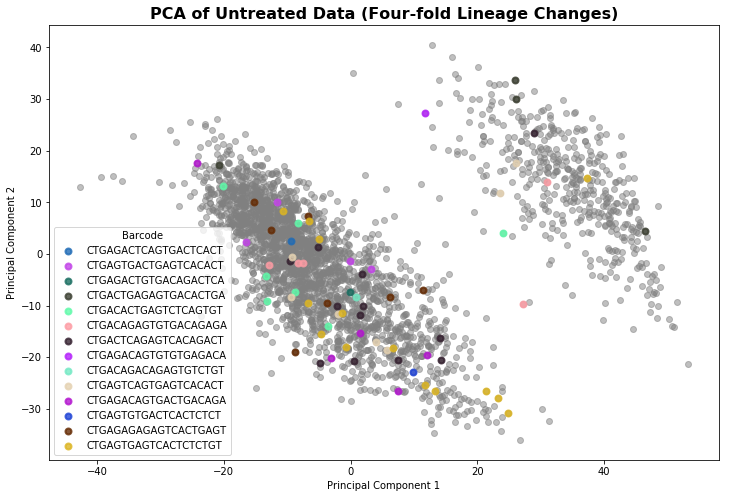

In [239]:
# Plot normalized data PCA with lineage information
% matplotlib inline

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(norm_pca_UU.explained_variance_ratio_))

dims = (12,8)

fig,ax = plt.subplots(figsize=dims)

plt.scatter(norm_sc_values_r_transform_UU[:,0], norm_sc_values_r_transform_UU[:,1],
            color = 'grey', alpha = 0.5)

# sc_data_UU_norm_fourfold = sc_data_UU_norm[sc_data_UU_norm['Barcode'].isin(four_fold_change_list)]
# sc_data_UU_norm_fourfold
# sc_data_UU_norm_fourfold.shape

# for color in colors:

# sc_data_UU_norm_fourfold_index = sc_data_UU_norm.index[sc_data_UU_norm['Barcode'].isin(four_fold_change_list)]
# sc_data_UU_norm_fourfold_index
# norm_sc_values_r_transform_UU[47,0]
# norm_sc_values_r_transform_UU[47,1]


for color, i, bc_name in zip(colors, range(len(barcode_color_df['Barcode'])), barcode_color_df['Barcode']):
#     if color
#     print(color)
#     print(i)
#     print(bc_name)
#     print(norm_sc_values_r_transform_fourfold_UU[norm_bc_names_fourfold_numindexed_UU==i,0])
    plt.scatter(norm_sc_values_r_transform_fourfold_UU[norm_bc_names_fourfold_numindexed_UU==i,0], 
                norm_sc_values_r_transform_fourfold_UU[norm_bc_names_fourfold_numindexed_UU==i,1], 
                color=color, alpha=0.8, lw=2, 
                label = bc_name)
plt.legend(loc='best', shadow=False, scatterpoints=1, title="Barcode")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('PCA of Untreated Data (Four-fold Lineage Changes)', fontsize = 16, weight = "bold")
plt.savefig("PCA_Untreated_fourFoldLineages.pdf")

explained variance ratio (first two components): [ 0.03297722  0.01462152]


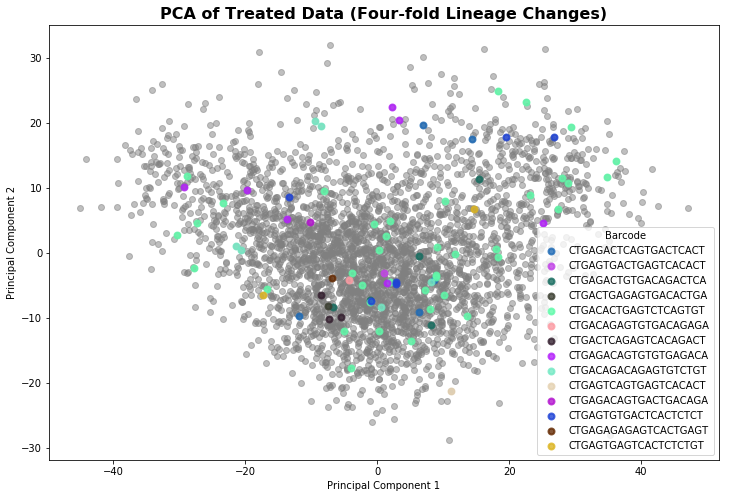

In [240]:
# Plot normalized data PCA with lineage information
% matplotlib inline

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(norm_pca_UT.explained_variance_ratio_))

dims = (12,8)

fig,ax = plt.subplots(figsize=dims)

plt.scatter(norm_sc_values_r_transform_UT[:,0], norm_sc_values_r_transform_UT[:,1],
            color = 'grey', alpha = 0.5)


for color, i, bc_name in zip(colors, range(len(barcode_color_df['Barcode'])), barcode_color_df['Barcode']):
    plt.scatter(norm_sc_values_r_transform_fourfold_UT[norm_bc_names_fourfold_numindexed_UT==i,0], 
                norm_sc_values_r_transform_fourfold_UT[norm_bc_names_fourfold_numindexed_UT==i,1], 
                color=color, alpha=0.8, lw=2, 
                label = bc_name)
plt.legend(loc='best', shadow=False, scatterpoints=1, title="Barcode")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('PCA of Treated Data (Four-fold Lineage Changes)', fontsize = 16, weight = "bold")
plt.savefig("PCA_Treated_fourFoldLineages.pdf")

In [152]:
# Principal Component Analysis with T-SNE
norm_pca_reindex_10comp_UU = PCA(n_components=10) # Copying 10x and ScanPy 
norm_sc_values_r_reindex_10comp_UU = norm_pca_reindex_10comp_UU.fit(sc_data_UU_norm_reindex.iloc[:,4:])
norm_sc_values_r_transform_reindex_10comp_UU = norm_pca_reindex_10comp_UU.fit(sc_data_UU_norm_reindex.iloc[:,4:]).transform(sc_data_UU_norm_reindex.iloc[:,4:])

norm_pca_reindex_10comp_UT = PCA(n_components=10) # Copying 10x and ScanPy 
norm_sc_values_r_reindex_10comp_UT = norm_pca_reindex_10comp_UT.fit(sc_data_UT_norm_reindex.iloc[:,4:])
norm_sc_values_r_transform_reindex_10comp_UT = norm_pca_reindex_10comp_UT.fit(sc_data_UT_norm_reindex.iloc[:,4:]).transform(sc_data_UT_norm_reindex.iloc[:,4:])

In [153]:
from MulticoreTSNE import MulticoreTSNE as TSNE
import time as time

perplexities = [5,10,15,20,25,30,35,40,45,50]

print 'Untreated Data'

tsne_norm_reindex_10comp_diffperp_results_UU = []
for perp in perplexities:
    time_start = time.time()
    tsne_norm_reindex_10comp_diffperp_UU = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=1000, n_jobs=8)
    tsne_norm_reindex_10comp_diffperp_results_UU.append(tsne_norm_reindex_10comp_diffperp_UU.fit_transform(norm_sc_values_r_transform_reindex_10comp_UU))
    print perp
    print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)
    
print 'Untreated T-SNE Done!'
print 'Treated Data'

tsne_norm_reindex_10comp_diffperp_results_UT = []
for perp in perplexities:
    time_start = time.time()
    tsne_norm_reindex_10comp_diffperp_UT = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=1000, n_jobs=8)
    tsne_norm_reindex_10comp_diffperp_results_UT.append(tsne_norm_reindex_10comp_diffperp_UT.fit_transform(norm_sc_values_r_transform_reindex_10comp_UT))
    print perp
    print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

print 'Treated T-SNE Done!'

Untreated Data
5
t-SNE done! Time elapsed: 18.1673600674 seconds
10
t-SNE done! Time elapsed: 16.9352309704 seconds
15
t-SNE done! Time elapsed: 16.3628189564 seconds
20
t-SNE done! Time elapsed: 17.0494599342 seconds
25
t-SNE done! Time elapsed: 16.4613449574 seconds
30
t-SNE done! Time elapsed: 19.1503307819 seconds
35
t-SNE done! Time elapsed: 17.9972290993 seconds
40
t-SNE done! Time elapsed: 19.2600069046 seconds
45
t-SNE done! Time elapsed: 20.4141571522 seconds
50
t-SNE done! Time elapsed: 19.7333669662 seconds
Untreated T-SNE Done!
Treated Data
5
t-SNE done! Time elapsed: 19.2504339218 seconds
10
t-SNE done! Time elapsed: 19.2564930916 seconds
15
t-SNE done! Time elapsed: 19.622672081 seconds
20
t-SNE done! Time elapsed: 19.8851289749 seconds
25
t-SNE done! Time elapsed: 20.4809708595 seconds
30
t-SNE done! Time elapsed: 20.8936231136 seconds
35
t-SNE done! Time elapsed: 21.6366150379 seconds
40
t-SNE done! Time elapsed: 23.7507250309 seconds
45
t-SNE done! Time elapsed: 24.484

In [160]:
p=6 #perplexity = 35

tsne_norm_reindex_10comp_perp35_UU = tsne_norm_reindex_10comp_diffperp_results_UU[p][norm_bc_names_fourfold_numindexed_UU.index]
tsne_norm_reindex_10comp_perp35_UU

tsne_norm_reindex_10comp_perp35_UT = tsne_norm_reindex_10comp_diffperp_results_UT[p][norm_bc_names_fourfold_numindexed_UT.index]
tsne_norm_reindex_10comp_perp35_UT

array([[ 29.81997411, -13.64912715],
       [  7.78491671,   4.21215011],
       [-12.86297418,   1.88328264],
       [ -1.188062  ,  25.66929869],
       [ 13.63763185,   6.5233408 ],
       [  5.87693059, -12.98748167],
       [ 16.42997974,  -7.35443009],
       [  9.45018417,  18.2354219 ],
       [-26.65539397,   7.95208795],
       [ 15.69944824,   8.11058362],
       [-14.76075123,  27.56289892],
       [-15.90734734,  24.66650143],
       [ -4.51098952,  21.28740622],
       [ 18.80479482, -18.536141  ],
       [ 14.26977835,  -2.73805879],
       [-14.33273812,  26.30128741],
       [ 21.41718022,  -2.61131013],
       [ -3.79005393, -17.46471179],
       [-13.14613049,  28.13522711],
       [ -0.20028842,  14.43790906],
       [ 12.78242014,   5.84015218],
       [ 18.80027615, -20.77688738],
       [  6.14873382,  -5.70854169],
       [ 15.34699507,  -7.66747953],
       [-22.76114645,   0.14764446],
       [ 22.38488215,  11.49285069],
       [  5.90438761,   6.40491339],
 

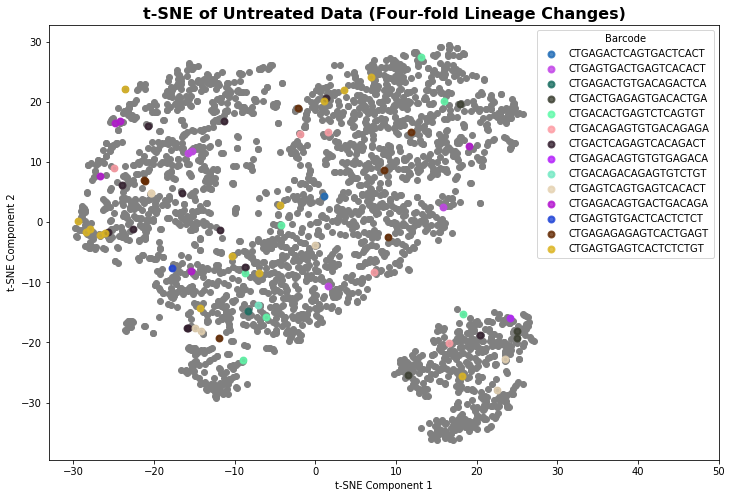

In [165]:
fig = plt.figure(figsize = (12,8))

p=6
plt.scatter(tsne_norm_reindex_10comp_diffperp_results_UU[p][:,0], tsne_norm_reindex_10comp_diffperp_results_UU[p][:,1], color = "grey")

for color, i, bc_name in zip(colors, range(len(barcode_color_df['Barcode'])), barcode_color_df['Barcode']):
    plt.scatter(tsne_norm_reindex_10comp_perp35_UU[norm_bc_names_fourfold_numindexed_UU==i,0], 
                tsne_norm_reindex_10comp_perp35_UU[norm_bc_names_fourfold_numindexed_UU==i,1], 
                color=color, alpha=0.8, lw=2, 
                label = bc_name)

plt.legend(loc='upper right', shadow=False, scatterpoints=1, title="Barcode")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.xlim(-33,50)
plt.title('t-SNE of Untreated Data (Four-fold Lineage Changes)', fontsize = 16, weight = "bold")

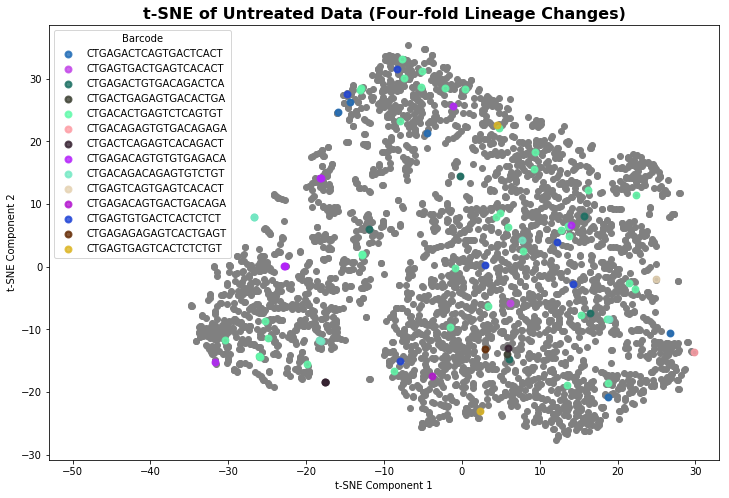

In [168]:
fig = plt.figure(figsize = (12,8))

p=6
plt.scatter(tsne_norm_reindex_10comp_diffperp_results_UT[p][:,0], tsne_norm_reindex_10comp_diffperp_results_UT[p][:,1], color = "grey")

for color, i, bc_name in zip(colors, range(len(barcode_color_df['Barcode'])), barcode_color_df['Barcode']):
    plt.scatter(tsne_norm_reindex_10comp_perp35_UT[norm_bc_names_fourfold_numindexed_UT==i,0], 
                tsne_norm_reindex_10comp_perp35_UT[norm_bc_names_fourfold_numindexed_UT==i,1], 
                color=color, alpha=0.8, lw=2, 
                label = bc_name)

plt.legend(loc='upper left', shadow=False, scatterpoints=1, title="Barcode")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.xlim(-53,33)
plt.title('t-SNE of Untreated Data (Four-fold Lineage Changes)', fontsize = 16, weight = "bold")

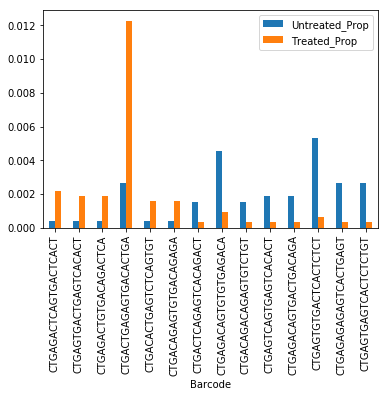

In [151]:
four_fold_change_plot = four_fold_change[['Barcode', 'Untreated_Prop', 'Treated_Prop']]
four_fold_change_plot = four_fold_change_plot.set_index('Barcode')
# four_fold_change_plot
four_fold_change_plot.plot.bar()

In [175]:
sc_data_UU_norm_reindex.iloc[:,4:].head()

,WASH7P,LOC729737,LOC100288069,FAM87B,LINC00115,LINC01128,FAM41C,SAMD11,NOC2L,KLHL17,...,FUNDC2,CMC4,MTCP1,BRCC3,VBP1,RAB39B,CLIC2,TMLHE,SPRY3,VAMP7
0,0.0,0.0,0.0,0.0,0.0,0.842065,0.0,0.0,0.842065,0.0,...,2.633824,1.535212,0.0,0.0,1.535212,0.0,0.0,0.842065,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.836935,0.0,...,2.143788,0.000000,0.0,0.0,2.836935,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.312802,0.0,...,2.229093,0.000000,0.0,0.0,1.312802,0.0,0.0,0.619655,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.631377,0.0,...,0.000000,1.631377,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [180]:
anova_SDG = pd.read_csv('ANOVA_SDG.csv')
gene_list = list(anova_SDG['x'])
gene_list

['ENPP4',
 'PDK4',
 'FAM214B',
 'TMEM98',
 'SPATA20',
 'TNFRSF12A',
 'ADIPOR2',
 'MYLIP',
 'IFFO1',
 'CD22',
 'RNF14',
 'DDX11',
 'RALBP1',
 'SNAI2',
 'SAMD4A',
 'NDUFS1',
 'PLEKHO1',
 'CD44',
 'PRKCH',
 'TNC',
 'RETSAT',
 'CTNNA1',
 'HSPA5',
 'GPM6B',
 'TSPAN17',
 'GYG2',
 'DCBLD2',
 'GDI2',
 'USP13',
 'CS',
 'EIF4B',
 'GPC1',
 'PPP2R5A',
 'PFKP',
 'NUCKS1',
 'TCOF1',
 'RPS6KA2',
 'TRIB2',
 'DAZAP1',
 'MGLL',
 'LMAN1',
 'ARHGEF1',
 'ADCY2',
 'LXN',
 'COL5A3',
 'MEF2C',
 'LRP2',
 'STRADB',
 'COL19A1',
 'SERTAD4',
 'TDRD3',
 'KIF3C',
 'PPP1R15A',
 'ADD1',
 'XRN2',
 'TESC',
 'CFAP61',
 'MCOLN1',
 'NRCAM',
 'RAPGEF4',
 'SEL1L3',
 'CDC45',
 'CREM',
 'JAK2',
 'HPS4',
 'PATZ1',
 'EIF3L',
 'SLC5A4',
 'KDELR3',
 'ASB2',
 'PLTP',
 'MYBL2',
 'EEF1A2',
 'TRIB3',
 'JAG1',
 'APMAP',
 'SRPX',
 'BEX4',
 'COTL1',
 'SYT17',
 'SFRP1',
 'POP1',
 'PLAT',
 'SLC39A14',
 'BNIP3L',
 'SLC17A7',
 'NOVA2',
 'ATP1A3',
 'DDX49',
 'SMG9',
 'CAV1',
 'CPVL',
 'FKBP14',
 'ZNF862',
 'TSPAN13',
 'GIMAP2',
 'LIMK1',
 'TY

In [204]:
total_col_list_UU = sc_data_UU_norm_reindex.iloc[:,4:].columns.get_values().tolist()
total_col_list_UU

['WASH7P',
 'LOC729737',
 'LOC100288069',
 'FAM87B',
 'LINC00115',
 'LINC01128',
 'FAM41C',
 'SAMD11',
 'NOC2L',
 'KLHL17',
 'PLEKHN1',
 'PERM1',
 'HES4',
 'ISG15',
 'AGRN',
 'C1orf159',
 'TNFRSF4',
 'SDF4',
 'B3GALT6',
 'FAM132A',
 'UBE2J2',
 'SCNN1D',
 'ACAP3',
 'PUSL1',
 'CPSF3L',
 'GLTPD1',
 'DVL1',
 'MXRA8',
 'AURKAIP1',
 'CCNL2',
 'LOC148413',
 'MRPL20',
 'VWA1',
 'ATAD3C',
 'ATAD3B',
 'ATAD3A',
 'TMEM240',
 'SSU72',
 'C1orf233',
 'MIB2',
 'CDK11B',
 'SLC35E2B',
 'CDK11A',
 'SLC35E2',
 'NADK',
 'GNB1',
 'TMEM52',
 'PRKCZ',
 'C1orf86',
 'SKI',
 'MORN1',
 'LOC100129534',
 'RER1',
 'PEX10',
 'PANK4',
 'LOC115110',
 'LOC100133445',
 'TNFRSF14',
 'FAM213B',
 'MMEL1',
 'ARHGEF16',
 'MEGF6',
 'TPRG1L',
 'WRAP73',
 'SMIM1',
 'LRRC47',
 'CEP104',
 'DFFB',
 'C1orf174',
 'LINC01134',
 'LOC284661',
 'AJAP1',
 'NPHP4',
 'KCNAB2',
 'RPL22',
 'RNF207',
 'ICMT',
 'LINC00337',
 'GPR153',
 'ACOT7',
 'ESPN',
 'TNFRSF25',
 'PLEKHG5',
 'NOL9',
 'ZBTB48',
 'KLHL21',
 'PHF13',
 'THAP3',
 'DNAJC11',
 'C

In [202]:
total_col_list_UT = sc_data_UT_norm_reindex.iloc[:,4:].columns.get_values().tolist()
total_col_list_UT

['WASH7P',
 'LOC100288069',
 'FAM87B',
 'LINC00115',
 'LINC01128',
 'FAM41C',
 'SAMD11',
 'NOC2L',
 'KLHL17',
 'PLEKHN1',
 'PERM1',
 'HES4',
 'ISG15',
 'AGRN',
 'C1orf159',
 'SDF4',
 'B3GALT6',
 'FAM132A',
 'UBE2J2',
 'SCNN1D',
 'ACAP3',
 'PUSL1',
 'CPSF3L',
 'GLTPD1',
 'DVL1',
 'AURKAIP1',
 'CCNL2',
 'LOC148413',
 'MRPL20',
 'VWA1',
 'ATAD3C',
 'ATAD3B',
 'ATAD3A',
 'TMEM240',
 'SSU72',
 'C1orf233',
 'MIB2',
 'CDK11B',
 'SLC35E2B',
 'CDK11A',
 'SLC35E2',
 'NADK',
 'GNB1',
 'TMEM52',
 'PRKCZ',
 'C1orf86',
 'SKI',
 'MORN1',
 'LOC100129534',
 'RER1',
 'PEX10',
 'PANK4',
 'LOC115110',
 'LOC100133445',
 'TNFRSF14',
 'FAM213B',
 'MMEL1',
 'MEGF6',
 'TPRG1L',
 'WRAP73',
 'SMIM1',
 'LRRC47',
 'CEP104',
 'DFFB',
 'C1orf174',
 'LINC01134',
 'LOC284661',
 'NPHP4',
 'KCNAB2',
 'RPL22',
 'RNF207',
 'ICMT',
 'LINC00337',
 'GPR153',
 'ACOT7',
 'ESPN',
 'TNFRSF25',
 'PLEKHG5',
 'NOL9',
 'ZBTB48',
 'KLHL21',
 'PHF13',
 'THAP3',
 'DNAJC11',
 'CAMTA1',
 'VAMP3',
 'PER3',
 'PARK7',
 'ERRFI1',
 'RERE',
 '

In [206]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
 
shared_genes_UU = intersection(gene_list, total_col_list_UU)
len(shared_genes_UU)

shared_genes_UT = intersection(gene_list, total_col_list_UT)
len(shared_genes_UT)

shared_genes_all = intersection(shared_genes_UU, shared_genes_UT)
len(shared_genes_all)

360

In [194]:
sc_data_UU_norm_reindex_subset_UU = sc_data_UU_norm_reindex[shared_genes_UU]
sc_data_UU_norm_reindex_subset_UU.head()

,IFFO1,RNF14,HSPA5,HSPA2,FKBP2,GPM6B,SEMA4C,ZNF703,SMG9,ESPL1,...,TNC,TMX2,ALDH1B1,ABCC11,DAZAP1,DAZAP2,ACTN4,TXNDC15,SLC7A11,SDHD
0,0.0,1.535212,2.228359,0.0,2.633824,2.228359,0.000000,0.0,0.842065,0.000000,...,1.940677,2.787975,0.842065,0.0,2.451503,2.451503,3.977559,0.842065,0.000000,0.842065
1,0.0,2.143788,0.000000,0.0,2.143788,2.143788,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,3.530082,0.0,2.836935,0.000000,0.000000,0.000000,0.000000,2.836935
2,0.0,0.619655,2.565565,0.0,2.005949,2.699097,0.619655,0.0,0.619655,0.619655,...,0.619655,3.104562,0.000000,0.0,2.005949,2.699097,2.816880,0.619655,0.619655,1.718267
3,0.0,0.000000,0.000000,0.0,4.163195,3.064582,0.000000,0.0,0.000000,0.000000,...,0.000000,2.659117,0.000000,0.0,1.965970,1.965970,0.000000,0.000000,0.000000,1.965970
4,0.0,0.000000,2.729989,0.0,3.240815,3.423136,0.000000,0.0,0.000000,0.000000,...,1.631377,2.324524,0.000000,0.0,2.324524,1.631377,0.000000,0.000000,0.000000,0.000000


In [241]:
subclones_RNAseq = pd.read_csv('subclones_RNAseq.csv')

In [246]:
subclones_RNAseq.set_index('Unnamed: 0', inplace=True)
subclones_RNAseq

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,X.21066,BMS1P21,X.21067,X.21068,X.21069,X.21070,X.21071,HYMAI,RARRES2P11,X.21072
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SC01_rep1,1241,0,1296,443,751,0,6,1868,1377,1792,...,0,0,140,14,0,0,1,0,3,0
SC01_rep2,1024,0,1136,350,605,0,7,1757,1166,1559,...,1,0,102,7,0,2,0,0,5,0
SC01_rep3,1232,0,1226,367,641,1,4,1826,1236,1546,...,0,0,141,3,0,0,0,0,2,0
SC07_rep1,1868,0,1125,323,729,1,1,1054,1148,1294,...,0,0,85,1,0,0,0,0,3,0
SC07_rep2,2071,0,1325,440,897,0,0,1290,1376,1469,...,0,0,124,13,0,0,0,0,11,0
SC07_rep3,1761,0,1078,313,827,2,0,956,1080,1217,...,0,0,133,9,0,1,0,2,7,0
SC10_rep1,1972,0,1306,361,705,3,0,1419,1436,1311,...,1,0,108,10,0,0,0,0,26,0
SC10_rep2,1874,0,1163,298,637,2,0,1266,1217,1148,...,1,0,120,0,0,0,0,0,15,0
SC10_rep3,2038,0,1395,248,701,1,1,1339,1246,1063,...,1,0,119,5,0,1,0,0,14,0


In [362]:
sc_counts_UU = sc_values_UU[shared_genes_all]
sc_counts_UU.head()

,IFFO1,RNF14,HSPA5,HSPA2,FKBP2,GPM6B,SEMA4C,ZNF703,SMG9,ESPL1,...,TNC,TMX2,ALDH1B1,ABCC11,DAZAP1,DAZAP2,ACTN4,TXNDC15,SLC7A11,SDHD
0,0,2,4,0,6,4,0,0,1,0,...,3,7,1,0,5,5,23,1,0,1
1,0,1,0,0,1,1,0,0,0,0,...,0,0,4,0,2,0,0,0,0,2
2,0,1,7,0,4,8,1,0,1,1,...,1,12,0,0,4,8,9,1,1,3
3,0,0,0,0,9,3,0,0,0,0,...,0,2,0,0,1,1,0,0,0,1
4,0,0,3,0,5,6,0,0,0,0,...,1,2,0,0,2,1,0,0,0,0


In [363]:
subclones_counts = subclones_RNAseq[shared_genes_all]
subclones_counts.head()

,IFFO1,RNF14,HSPA5,HSPA2,FKBP2,GPM6B,SEMA4C,ZNF703,SMG9,ESPL1,...,TNC,TMX2,ALDH1B1,ABCC11,DAZAP1,DAZAP2,ACTN4,TXNDC15,SLC7A11,SDHD
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SC01_rep1,1143,3522,24269,1893,778,13448,1095,1096,2239,3353,...,25703,3291,6104,147,6532,9052,29335,1520,142,2301
SC01_rep2,939,3002,21653,1642,692,11421,968,942,1993,3010,...,21957,3051,5545,138,5778,8087,25822,1301,120,1983
SC01_rep3,1052,3224,22625,1732,679,12257,1002,1089,2121,3047,...,21904,3304,6108,137,6141,8539,26551,1390,126,2115
SC07_rep1,699,4113,28871,657,1475,8350,429,8429,1881,2613,...,6,5062,12585,53,5426,6550,15526,1008,1782,2568
SC07_rep2,867,4839,33432,763,1613,9860,489,9733,2241,2951,...,5,6106,14648,61,6495,7443,17819,1188,2158,3059


In [364]:
sc_pop_counts = pd.concat([sc_counts_UU, subclones_counts])
sc_pop_counts.tail(10)

,IFFO1,RNF14,HSPA5,HSPA2,FKBP2,GPM6B,SEMA4C,ZNF703,SMG9,ESPL1,...,TNC,TMX2,ALDH1B1,ABCC11,DAZAP1,DAZAP2,ACTN4,TXNDC15,SLC7A11,SDHD
2864,0,2,2,1,5,2,0,0,0,0,...,0,7,1,0,4,5,3,1,0,1
SC01_rep1,1143,3522,24269,1893,778,13448,1095,1096,2239,3353,...,25703,3291,6104,147,6532,9052,29335,1520,142,2301
SC01_rep2,939,3002,21653,1642,692,11421,968,942,1993,3010,...,21957,3051,5545,138,5778,8087,25822,1301,120,1983
SC01_rep3,1052,3224,22625,1732,679,12257,1002,1089,2121,3047,...,21904,3304,6108,137,6141,8539,26551,1390,126,2115
SC07_rep1,699,4113,28871,657,1475,8350,429,8429,1881,2613,...,6,5062,12585,53,5426,6550,15526,1008,1782,2568
SC07_rep2,867,4839,33432,763,1613,9860,489,9733,2241,2951,...,5,6106,14648,61,6495,7443,17819,1188,2158,3059
SC07_rep3,752,4137,29308,676,1459,8155,417,9031,1950,2756,...,2,5450,13644,44,5727,6707,16397,1085,1834,2577
SC10_rep1,581,6258,44854,964,2369,7178,1915,15288,1354,1966,...,135,8215,10387,23,5334,4891,12247,2313,910,3523
SC10_rep2,541,5792,40668,843,2336,6523,1787,13914,1242,1772,...,109,7308,9343,21,4727,4264,11219,2088,836,3150
SC10_rep3,557,6098,43284,865,2489,6588,1781,13434,1209,1736,...,95,8090,9833,20,4919,4768,10239,2281,697,3266


In [365]:
## Data Cleaning - using suggested thresholds from ScanPy ##
# Filter out cells with less than 200 genes
nonzeroes_in_cols_combo = sc_pop_counts.astype(bool).sum(axis=1)
# nonzeroes_in_cols
sum(i > 200 for i in nonzeroes_in_cols_combo)
cell_norm_ind_combo = nonzeroes_in_cols_combo.index[nonzeroes_in_cols_combo > 200].tolist()
sc_cellnorm_combo = sc_pop_counts.ix[cell_norm_ind_combo]

# Filter out genes with less than 3 cells
nonzeroes_in_rows_combo = sc_cellnorm_combo.astype(bool).sum(axis=0)
sum(i > 3 for i in nonzeroes_in_rows_combo)
gene_norm_ind_combo = nonzeroes_in_rows_combo.index[nonzeroes_in_rows_combo > 3].tolist()
sc_cellgenenorm_combo = sc_cellnorm_combo[gene_norm_ind_combo]

## Data normalization - see powerpoint for detailed explanation ##
totGE_percell_combo = sc_cellgenenorm_combo.sum(axis = 1)
totGE_percell_norm_combo = sc_cellgenenorm_combo.div(totGE_percell_combo, axis=0)
totGE_percell_norm_scaled_combo = totGE_percell_norm_combo * 100000 #len(totGE_percell_norm.index)
totGE_percell_norm_scaled_log_combo = np.log(totGE_percell_norm_scaled_combo.astype(float))
totGE_percell_norm_scaled_log_noInf_combo = totGE_percell_norm_scaled_log_combo.replace([np.inf, -np.inf], 0)
totGE_percell_norm_scaled_log_noInf_combo

/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


,IFFO1,RNF14,HSPA5,HSPA2,FKBP2,GPM6B,SEMA4C,ZNF703,SMG9,ESPL1,...,TNC,TMX2,ALDH1B1,ABCC11,DAZAP1,DAZAP2,ACTN4,TXNDC15,SLC7A11,SDHD
2,0.000000,4.489167,6.435077,0.000000,5.875461,6.568608,4.489167,0.000000,4.489167,4.489167,...,4.489167,6.974073,0.000000,0.000000,5.875461,6.568608,6.686391,4.489167,4.489167,5.587779
10,4.502614,5.888908,6.805199,0.000000,6.900509,5.601226,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.888908,0.000000,0.000000,6.112052,6.987520,6.900509,4.502614,0.000000,6.112052
13,0.000000,6.035416,6.846347,0.000000,6.846347,6.846347,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.440882,5.747734,0.000000,6.595032,6.846347,6.440882,0.000000,4.649122,6.595032
17,0.000000,5.617605,5.212140,0.000000,7.409364,5.905287,0.000000,0.000000,0.000000,4.518992,...,4.518992,5.905287,4.518992,0.000000,6.464903,6.598434,6.716217,5.905287,0.000000,6.464903
28,0.000000,5.263916,6.650210,0.000000,6.180207,5.669381,0.000000,0.000000,4.570769,0.000000,...,0.000000,6.873354,5.957063,0.000000,6.873354,7.135718,6.873354,4.570769,0.000000,6.650210
33,4.656463,5.349611,6.265901,4.656463,7.295521,5.349611,4.656463,0.000000,0.000000,0.000000,...,6.265901,5.755076,5.755076,0.000000,6.735905,4.656463,5.349611,4.656463,0.000000,4.656463
44,0.000000,5.075974,5.769121,0.000000,6.328737,5.769121,0.000000,0.000000,0.000000,0.000000,...,6.174586,5.992265,5.769121,0.000000,6.328737,5.769121,6.328737,5.075974,0.000000,5.075974
98,0.000000,4.470639,6.080077,0.000000,6.773224,6.550081,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.262399,0.000000,0.000000,4.470639,5.856934,7.243228,5.163786,0.000000,5.856934
117,0.000000,6.112954,5.196664,0.000000,6.700741,6.295276,0.000000,0.000000,0.000000,4.503517,...,0.000000,6.295276,5.602129,0.000000,6.806102,5.602129,6.582958,0.000000,0.000000,5.196664
128,0.000000,4.077487,7.122010,4.077487,7.255541,5.686925,0.000000,0.000000,4.077487,0.000000,...,4.770635,5.686925,4.077487,0.000000,5.176100,6.380073,6.023398,4.077487,0.000000,5.686925


In [366]:
norm_pca_preSubset_combo = PCA(n_components=2)
norm_sc_values_r_preSubset_combo = norm_pca_preSubset_combo.fit(totGE_percell_norm_scaled_log_noInf_combo)
norm_sc_values_r_transform_preSubset_combo = norm_pca_preSubset_combo.fit(totGE_percell_norm_scaled_log_noInf_combo).transform(totGE_percell_norm_scaled_log_noInf_combo)

In [369]:
len(norm_sc_values_r_transform_preSubset_combo)

140

explained variance ratio (first two components): [ 0.0785581  0.0372771]


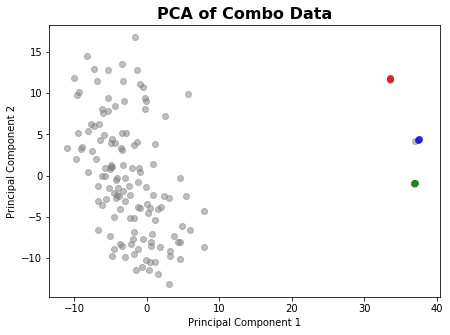

In [371]:
# Plot normalized data PCA for RNAseq subset genes
% matplotlib inline

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(norm_pca_preSubset_combo.explained_variance_ratio_))

dims = (7,5)

fig,ax = plt.subplots(figsize=dims)

plt.scatter(norm_sc_values_r_transform_preSubset_combo[:,0], norm_sc_values_r_transform_preSubset_combo[:,1],
            color = 'grey', alpha = 0.5)

plt.scatter(norm_sc_values_r_transform_preSubset_combo[131:133,0], norm_sc_values_r_transform_preSubset_combo[131:133,1],
            color = 'red', alpha = 0.5)
plt.scatter(norm_sc_values_r_transform_preSubset_combo[134:136,0], norm_sc_values_r_transform_preSubset_combo[134:136,1],
            color = 'green', alpha = 0.5)
plt.scatter(norm_sc_values_r_transform_preSubset_combo[137:139,0], norm_sc_values_r_transform_preSubset_combo[137:139,1],
            color = 'blue', alpha = 0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('PCA of Combo Data', fontsize = 16, weight = "bold")

In [350]:
## Data Cleaning - using suggested thresholds from ScanPy ##
# Filter out cells with less than 200 genes
nonzeroes_in_cols_RNAseq = subclones_RNAseq.astype(bool).sum(axis=1)
# nonzeroes_in_cols
sum(i > 200 for i in nonzeroes_in_cols_RNAseq)
cell_norm_ind_RNAseq = nonzeroes_in_cols_RNAseq.index[nonzeroes_in_cols_RNAseq > 200].tolist()
sc_cellnorm_RNAseq = subclones_RNAseq.ix[cell_norm_ind_RNAseq]

# Filter out genes with less than 3 cells
nonzeroes_in_rows_RNAseq = sc_cellnorm_RNAseq.astype(bool).sum(axis=0)
sum(i > 3 for i in nonzeroes_in_rows_RNAseq)
gene_norm_ind_RNAseq = nonzeroes_in_rows_RNAseq.index[nonzeroes_in_rows_RNAseq > 3].tolist()
sc_cellgenenorm_RNAseq = sc_cellnorm_RNAseq[gene_norm_ind_RNAseq]

## Data normalization - see powerpoint for detailed explanation ##
totGE_percell_RNAseq = sc_cellgenenorm_RNAseq.sum(axis = 1)
totGE_percell_norm_RNAseq = sc_cellgenenorm_RNAseq.div(totGE_percell_RNAseq, axis=0)
totGE_percell_norm_scaled_RNAseq = totGE_percell_norm_RNAseq * 100000 #len(totGE_percell_norm.index)
totGE_percell_norm_scaled_log_RNAseq = np.log(totGE_percell_norm_scaled_RNAseq.astype(float))
totGE_percell_norm_scaled_log_noInf_RNAseq = totGE_percell_norm_scaled_log_RNAseq.replace([np.inf, -np.inf], 0)
totGE_percell_norm_scaled_log_noInf_RNAseq

/Users/Corey/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,LINC01668,LINC02456,X.21053,SMUG1.AS1,X.21060,X.21063,X.21066,X.21067,X.21068,RARRES2P11
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SC01_rep1,1.285965,1.329330,0.255862,0.783698,0.000000,-4.045948,1.694916,1.389955,1.653380,0.479457,...,0.000000,-5.144560,-3.439812,-3.891797,-3.535122,0.000000,0.000000,-0.896065,-3.198650,-4.739095
SC01_rep2,1.220546,1.324343,0.147008,0.694303,0.000000,-3.765015,1.760438,1.350409,1.640874,0.529350,...,-4.612313,-3.765015,-3.765015,-4.612313,-3.919166,-5.710925,-5.710925,-1.085953,-3.765015,-4.101487
SC01_rep3,1.348816,1.343934,0.137784,0.695452,-5.767578,-4.381283,1.742305,1.352058,1.575849,0.579812,...,0.000000,-4.158140,-3.821668,-5.074430,-3.570353,-5.767578,0.000000,-0.818818,-4.668965,-5.074430
SC07_rep1,1.714088,1.207003,-0.040883,0.773139,-5.818535,-5.818535,1.141813,1.227241,1.346958,-0.220113,...,0.000000,-4.432241,-4.432241,-4.432241,-4.432241,0.000000,0.000000,-1.375884,-5.818535,-4.719923
SC07_rep2,1.658337,1.211718,0.109325,0.821606,0.000000,0.000000,1.184948,1.249487,1.314888,-0.244108,...,-5.977449,-4.368011,-4.185690,-4.031539,-4.368011,-5.977449,0.000000,-1.157168,-3.412500,-3.579554
SC07_rep3,1.627521,1.136747,-0.099913,0.871689,-5.152969,0.000000,1.016642,1.138600,1.258028,-0.304852,...,0.000000,-5.152969,-4.459821,-3.766674,-4.236678,-5.846116,0.000000,-0.955767,-3.648891,-3.900206
SC10_rep1,1.652164,1.240085,-0.045761,0.623558,-4.836027,0.000000,1.323068,1.334977,1.243906,0.041712,...,0.000000,-4.548345,-4.325201,-4.325201,-4.325201,0.000000,-5.934639,-1.252508,-3.632054,-2.676543
SC10_rep2,1.691203,1.214131,-0.147534,0.612142,-5.151480,0.000000,1.298990,1.259517,1.201149,0.004698,...,-5.844627,-4.458333,-4.746015,-4.458333,-3.542042,0.000000,-5.844627,-1.057136,0.000000,-3.136577
SC10_rep3,1.767183,1.388109,-0.339112,0.699967,-5.852541,-5.852541,1.347137,1.275153,1.116309,-0.008997,...,-5.159394,-4.060781,-3.655316,-5.852541,-3.773099,-5.852541,-5.852541,-1.073417,-4.243103,-3.213484


In [351]:
sc_data_RNAseq_subset = totGE_percell_norm_scaled_log_noInf_RNAseq[shared_genes_all]
sc_data_RNAseq_subset

,IFFO1,RNF14,HSPA5,HSPA2,FKBP2,GPM6B,SEMA4C,ZNF703,SMG9,ESPL1,...,TNC,TMX2,ALDH1B1,ABCC11,DAZAP1,DAZAP2,ACTN4,TXNDC15,SLC7A11,SDHD
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
SC01_rep1,1.203704,2.329077,4.259248,1.708211,0.819019,3.668878,1.160802,1.161715,1.876077,2.279903,...,4.316656,2.261239,2.878992,-0.847275,2.946761,3.273034,4.448829,1.488758,-0.881880,1.903392
SC01_rep2,1.133890,2.296109,4.271974,1.692745,0.828661,3.632284,1.164307,1.137080,1.886471,2.298770,...,4.285916,2.312299,2.909727,-0.783672,2.950888,3.287088,4.448057,1.459963,-0.923434,1.881441
SC01_rep3,1.190871,2.310800,4.259233,1.689454,0.753043,3.646275,1.142176,1.225437,1.892065,2.254335,...,4.226847,2.335311,2.949777,-0.847597,2.955165,3.284822,4.419245,1.469481,-0.931296,1.889232
SC07_rep1,0.731116,2.503373,4.452058,0.669149,1.477878,3.211482,0.242922,3.220898,1.721024,2.049719,...,-4.026776,2.710982,3.621726,-1.848243,2.780422,2.968685,3.831736,1.097188,1.666956,2.032348
SC07_rep2,0.787590,2.507014,4.439819,0.659809,1.408402,3.218792,0.214913,3.205828,1.737228,2.012450,...,-4.368011,2.739578,3.614610,-1.866576,2.801339,2.937580,3.810571,1.102577,1.699488,2.048394
SC07_rep3,0.776620,2.481610,4.439500,0.670077,1.439391,3.160271,0.186970,3.262303,1.729469,2.075420,...,-5.152969,2.757255,3.674939,-2.061926,2.806831,2.964791,3.858738,1.143219,1.668139,2.008265
SC10_rep1,0.430111,2.806977,4.776529,0.936452,1.835584,2.944137,1.622834,3.700184,1.276179,1.649117,...,-1.029365,3.079078,3.313671,-2.799145,2.647217,2.560513,3.478397,1.811661,0.878805,2.232429
SC10_rep2,0.448792,2.819606,4.768570,0.892340,1.911568,2.938462,1.643666,3.696024,1.279851,1.635237,...,-1.153279,3.052098,3.297755,-2.800105,2.616419,2.513336,3.480737,1.799335,0.884001,2.210530
SC10_rep3,0.470024,2.863175,4.822997,0.910189,1.967095,2.940464,1.632389,3.653003,1.245008,1.606798,...,-1.298664,3.145843,3.340958,-2.856809,2.648320,2.617141,3.381418,1.879828,0.694244,2.238780


In [352]:
sc_data_UU_norm_subset = sc_data_UU_norm_reindex_subset[shared_genes_all]
sc_data_UU_norm_subset.head()

,IFFO1,RNF14,HSPA5,HSPA2,FKBP2,GPM6B,SEMA4C,ZNF703,SMG9,ESPL1,...,TNC,TMX2,ALDH1B1,ABCC11,DAZAP1,DAZAP2,ACTN4,TXNDC15,SLC7A11,SDHD
0,0.0,1.535212,2.228359,0.0,2.633824,2.228359,0.000000,0.0,0.842065,0.000000,...,1.940677,2.787975,0.842065,0.0,2.451503,2.451503,3.977559,0.842065,0.000000,0.842065
1,0.0,2.143788,0.000000,0.0,2.143788,2.143788,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,3.530082,0.0,2.836935,0.000000,0.000000,0.000000,0.000000,2.836935
2,0.0,0.619655,2.565565,0.0,2.005949,2.699097,0.619655,0.0,0.619655,0.619655,...,0.619655,3.104562,0.000000,0.0,2.005949,2.699097,2.816880,0.619655,0.619655,1.718267
3,0.0,0.000000,0.000000,0.0,4.163195,3.064582,0.000000,0.0,0.000000,0.000000,...,0.000000,2.659117,0.000000,0.0,1.965970,1.965970,0.000000,0.000000,0.000000,1.965970
4,0.0,0.000000,2.729989,0.0,3.240815,3.423136,0.000000,0.0,0.000000,0.000000,...,1.631377,2.324524,0.000000,0.0,2.324524,1.631377,0.000000,0.000000,0.000000,0.000000


In [353]:
sc_pop_data = pd.concat([sc_data_UU_norm_subset, sc_data_RNAseq_subset])

In [354]:
sc_pop_data

,IFFO1,RNF14,HSPA5,HSPA2,FKBP2,GPM6B,SEMA4C,ZNF703,SMG9,ESPL1,...,TNC,TMX2,ALDH1B1,ABCC11,DAZAP1,DAZAP2,ACTN4,TXNDC15,SLC7A11,SDHD
0,0.000000,1.535212,2.228359,0.000000,2.633824,2.228359,0.000000,0.000000,0.842065,0.000000,...,1.940677,2.787975,0.842065,0.000000,2.451503,2.451503,3.977559,0.842065,0.000000,0.842065
1,0.000000,2.143788,0.000000,0.000000,2.143788,2.143788,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.530082,0.000000,2.836935,0.000000,0.000000,0.000000,0.000000,2.836935
2,0.000000,0.619655,2.565565,0.000000,2.005949,2.699097,0.619655,0.000000,0.619655,0.619655,...,0.619655,3.104562,0.000000,0.000000,2.005949,2.699097,2.816880,0.619655,0.619655,1.718267
3,0.000000,0.000000,0.000000,0.000000,4.163195,3.064582,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.659117,0.000000,0.000000,1.965970,1.965970,0.000000,0.000000,0.000000,1.965970
4,0.000000,0.000000,2.729989,0.000000,3.240815,3.423136,0.000000,0.000000,0.000000,0.000000,...,1.631377,2.324524,0.000000,0.000000,2.324524,1.631377,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,2.647331,1.954184,3.052797,0.000000,0.000000,0.000000,1.261037,0.000000,...,0.000000,2.647331,1.261037,0.000000,1.954184,2.359649,1.261037,1.261037,0.000000,1.954184
6,0.000000,0.000000,2.445878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.139025,0.000000,3.139025,2.445878,0.000000,0.000000,0.000000,3.832173
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.375156,2.375156,0.000000,2.375156,2.375156,2.375156,0.000000,0.000000,0.000000
8,0.000000,0.000000,3.365895,0.000000,3.248112,1.861817,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.267282,1.168670,0.000000,1.168670,1.168670,2.554964,1.168670,0.000000,1.168670
9,0.000000,0.000000,2.331156,0.000000,1.925691,0.000000,1.232544,0.000000,0.000000,0.000000,...,0.000000,1.232544,1.232544,0.000000,0.000000,2.331156,0.000000,1.232544,0.000000,1.232544


In [355]:
norm_pca_subset_combo = PCA(n_components=2)
norm_sc_values_r_subset_combo = norm_pca_subset_combo.fit(sc_pop_data)
norm_sc_values_r_transform_subset_combo = norm_pca_subset_combo.fit(sc_pop_data).transform(sc_pop_data)

explained variance ratio (first two components): [ 0.07762977  0.03987486]


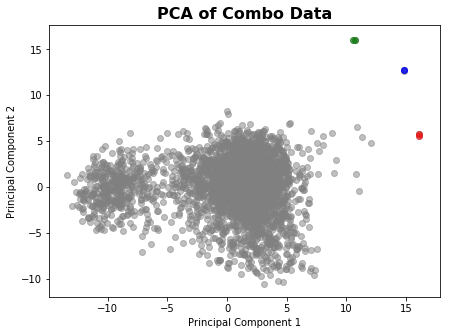

In [372]:
# Plot normalized data PCA for RNAseq subset genes
% matplotlib inline

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(norm_pca_subset_combo.explained_variance_ratio_))

dims = (7,5)

fig,ax = plt.subplots(figsize=dims)

plt.scatter(norm_sc_values_r_transform_subset_combo[:,0], norm_sc_values_r_transform_subset_combo[:,1],
            color = 'grey', alpha = 0.5)

plt.scatter(norm_sc_values_r_transform_subset_combo[2860:2862,0], norm_sc_values_r_transform_subset_combo[2860:2862,1],
            color = 'red', alpha = 0.5)
plt.scatter(norm_sc_values_r_transform_subset_combo[2863:2865,0], norm_sc_values_r_transform_subset_combo[2863:2865,1],
            color = 'green', alpha = 0.5)
plt.scatter(norm_sc_values_r_transform_subset_combo[2866:2868,0], norm_sc_values_r_transform_subset_combo[2866:2868,1],
            color = 'blue', alpha = 0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('PCA of Combo Data', fontsize = 16, weight = "bold")
plt.savefig("PCA_scRNAseqUU_RNAseqClones_combo.pdf")

In [357]:
# Principal Component Analysis with T-SNE
norm_pca_reindex_10comp_subset_combo = PCA(n_components=10) # Copying 10x and ScanPy 
norm_sc_values_r_reindex_10comp_subset_combo = norm_pca_reindex_10comp_subset_combo.fit(sc_pop_data)
norm_sc_values_r_transform_reindex_10comp_subset_combo = norm_pca_reindex_10comp_subset_combo.fit(sc_pop_data).transform(sc_pop_data)

perplexities = [5,10,15,20,25,30,35,40,45,50]

print 'Untreated Data'

tsne_norm_reindex_10comp_diffperp_subset_results_combo = []
for perp in perplexities:
    time_start = time.time()
    tsne_norm_reindex_10comp_diffperp_subset_combo = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=1000, n_jobs=8)
    tsne_norm_reindex_10comp_diffperp_subset_results_combo.append(tsne_norm_reindex_10comp_diffperp_subset_combo.fit_transform(norm_sc_values_r_transform_reindex_10comp_subset_combo))
    print perp
    print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)
    
print 'Untreated T-SNE Done!'

Untreated Data
5
t-SNE done! Time elapsed: 16.5716938972 seconds
10
t-SNE done! Time elapsed: 16.0689048767 seconds
15
t-SNE done! Time elapsed: 15.6112818718 seconds
20
t-SNE done! Time elapsed: 17.0392849445 seconds
25
t-SNE done! Time elapsed: 17.7881340981 seconds
30
t-SNE done! Time elapsed: 19.8304049969 seconds
35
t-SNE done! Time elapsed: 19.3123369217 seconds
40
t-SNE done! Time elapsed: 25.0434801579 seconds
45
t-SNE done! Time elapsed: 23.3746740818 seconds
50
t-SNE done! Time elapsed: 19.0910730362 seconds
Untreated T-SNE Done!


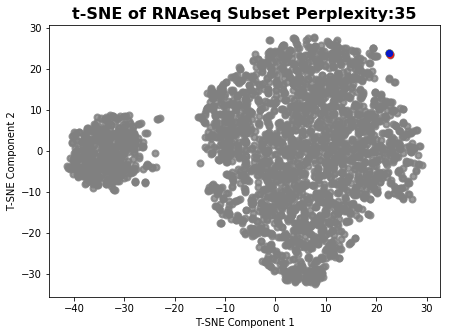

In [358]:
fig = plt.figure(figsize = (7,5))
p=6
plt.scatter(tsne_norm_reindex_10comp_diffperp_subset_results_combo[p][:,0], 
            tsne_norm_reindex_10comp_diffperp_subset_results_combo[p][:,1], 
            color='grey', alpha=0.8, lw=2)

plt.scatter(tsne_norm_reindex_10comp_diffperp_subset_results_combo[p][2860:2862,0], tsne_norm_reindex_10comp_diffperp_subset_results_combo[p][2860:2862,1],
            color = 'red', alpha = 0.5)
plt.scatter(tsne_norm_reindex_10comp_diffperp_subset_results_combo[p][2863:2865,0], tsne_norm_reindex_10comp_diffperp_subset_results_combo[p][2863:2865,1],
            color = 'green', alpha = 0.5)
plt.scatter(tsne_norm_reindex_10comp_diffperp_subset_results_combo[p][2866:2868,0], tsne_norm_reindex_10comp_diffperp_subset_results_combo[p][2866:2868,1],
            color = 'blue', alpha = 0.5)

plt.title("t-SNE of RNAseq Subset Perplexity:" + str(perplexities[p]),fontsize = 16, weight = "bold")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")

In [269]:
norm_pca_subset_RNAseq = PCA(n_components=2)
norm_sc_values_r_subset_RNAseq = norm_pca_subset_RNAseq.fit(sc_data_RNAseq_subset)
norm_sc_values_r_transform_subset_RNAseq = norm_pca_subset_RNAseq.fit(sc_data_RNAseq_subset).transform(sc_data_RNAseq_subset)

explained variance ratio (first two components): [ 0.8077849   0.18846463]


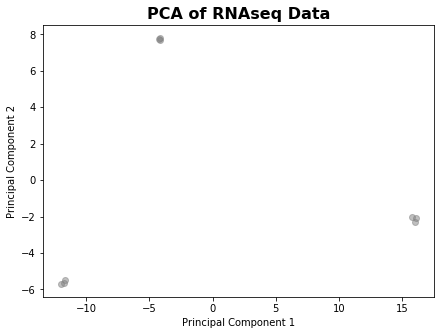

In [270]:
# Plot normalized data PCA for RNAseq subset genes
% matplotlib inline

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(norm_pca_subset_RNAseq.explained_variance_ratio_))

dims = (7,5)

fig,ax = plt.subplots(figsize=dims)

plt.scatter(norm_sc_values_r_transform_subset_RNAseq[:,0], norm_sc_values_r_transform_subset_RNAseq[:,1],
            color = 'grey', alpha = 0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('PCA of RNAseq Data', fontsize = 16, weight = "bold")

In [195]:
norm_pca_subset_UU = PCA(n_components=2)
norm_sc_values_r_subset_UU = norm_pca_subset_UU.fit(sc_data_UU_norm_reindex_subset_UU)
norm_sc_values_r_transform_subset_UU = norm_pca_subset_UU.fit(sc_data_UU_norm_reindex_subset_UU).transform(sc_data_UU_norm_reindex_subset_UU)

explained variance ratio (first two components): [ 0.0414845   0.03140891]


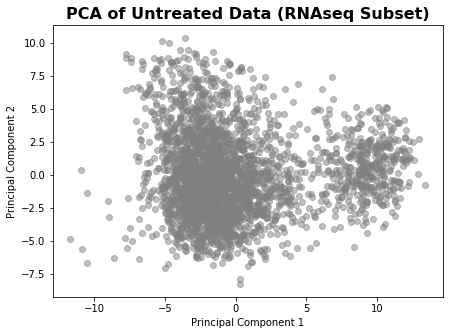

In [229]:
# Plot normalized data PCA for RNAseq subset genes
% matplotlib inline

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(norm_pca_subset_UU.explained_variance_ratio_))

dims = (7,5)

fig,ax = plt.subplots(figsize=dims)

plt.scatter(norm_sc_values_r_transform_subset_UU[:,0], norm_sc_values_r_transform_subset_UU[:,1],
            color = 'grey', alpha = 0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('PCA of Untreated Data (RNAseq Subset)', fontsize = 16, weight = "bold")
plt.savefig('PCA_untreated_RNAseqSubset_grey.pdf')

In [198]:
# Principal Component Analysis with T-SNE
norm_pca_reindex_10comp_subset_UU = PCA(n_components=10) # Copying 10x and ScanPy 
norm_sc_values_r_reindex_10comp_subset_UU = norm_pca_reindex_10comp_subset_UU.fit(sc_data_UU_norm_reindex_subset_UU)
norm_sc_values_r_transform_reindex_10comp_subset_UU = norm_pca_reindex_10comp_subset_UU.fit(sc_data_UU_norm_reindex_subset_UU).transform(sc_data_UU_norm_reindex_subset_UU)

perplexities = [5,10,15,20,25,30,35,40,45,50]

print 'Untreated Data'

tsne_norm_reindex_10comp_diffperp_subset_results_UU = []
for perp in perplexities:
    time_start = time.time()
    tsne_norm_reindex_10comp_diffperp_subset_UU = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=1000, n_jobs=8)
    tsne_norm_reindex_10comp_diffperp_subset_results_UU.append(tsne_norm_reindex_10comp_diffperp_subset_UU.fit_transform(norm_sc_values_r_transform_reindex_10comp_subset_UU))
    print perp
    print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)
    
print 'Untreated T-SNE Done!'

Untreated Data
5
t-SNE done! Time elapsed: 15.3969619274 seconds
10
t-SNE done! Time elapsed: 15.010874033 seconds
15
t-SNE done! Time elapsed: 17.5003631115 seconds
20
t-SNE done! Time elapsed: 16.6052138805 seconds
25
t-SNE done! Time elapsed: 16.9728600979 seconds
30
t-SNE done! Time elapsed: 18.6098499298 seconds
35
t-SNE done! Time elapsed: 19.9853599072 seconds
40
t-SNE done! Time elapsed: 19.5636548996 seconds
45
t-SNE done! Time elapsed: 18.6538388729 seconds
50
t-SNE done! Time elapsed: 18.4435758591 seconds
Untreated T-SNE Done!


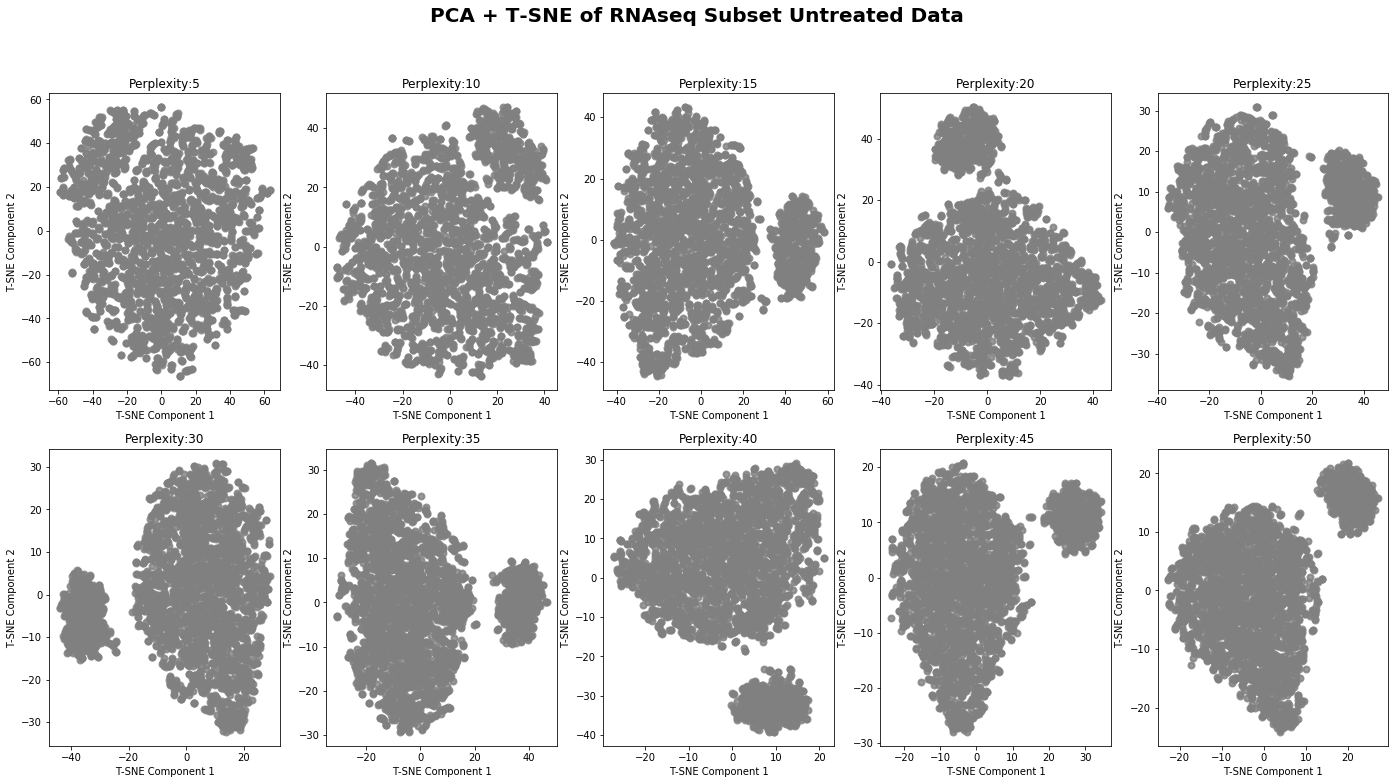

In [199]:
fig = plt.figure(figsize = (24,12))
fig.suptitle("PCA + T-SNE of RNAseq Subset Untreated Data", fontsize = 20, weight = "bold")
for p in range(len(tsne_norm_reindex_10comp_diffperp_subset_results_UU)):
    ax = fig.add_subplot(2,5,p+1)
    ax.set_title("Perplexity:" + str(perplexities[p]))
    ax.set_xlabel("T-SNE Component 1")
    ax.set_ylabel("T-SNE Component 2")
    plt.scatter(tsne_norm_reindex_10comp_diffperp_subset_results_UU[p][:,0], 
                tsne_norm_reindex_10comp_diffperp_subset_results_UU[p][:,1], 
                color='grey', alpha=0.8, lw=2)


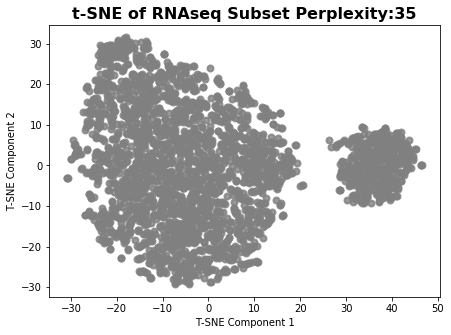

In [230]:
fig = plt.figure(figsize = (7,5))
p=6
plt.scatter(tsne_norm_reindex_10comp_diffperp_subset_results_UU[p][:,0], 
            tsne_norm_reindex_10comp_diffperp_subset_results_UU[p][:,1], 
            color='grey', alpha=0.8, lw=2)
plt.title("t-SNE of RNAseq Subset Perplexity:" + str(perplexities[p]),fontsize = 16, weight = "bold")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.savefig('t-SNE_untreated_RNAseqSubset_grey.pdf')

In [208]:
sc_data_UT_norm_reindex_subset = sc_data_UT_norm_reindex[shared_genes_UT]
sc_data_UT_norm_reindex_subset.head()

,IFFO1,RNF14,HSPA5,HSPA2,FKBP2,GPM6B,SEMA4C,ZNF703,SMG9,ESPL1,...,TNC,TMX2,ALDH1B1,ABCC11,DAZAP1,DAZAP2,ACTN4,TXNDC15,SLC7A11,SDHD
0,0.000000,0.810063,1.503210,0.000000,3.007288,0.810063,0.0,0.0,0.810063,0.000000,...,0.0,1.908675,0.000000,0.0,2.601823,2.196357,0.000000,1.503210,0.000000,2.889505
1,0.000000,0.000000,0.000000,0.000000,3.582550,2.695247,0.0,0.0,0.000000,1.442484,...,0.0,1.442484,0.000000,0.0,2.135631,2.541096,1.442484,0.749337,0.749337,2.135631
2,0.000000,2.015003,2.015003,0.916391,2.302685,1.609538,0.0,0.0,0.000000,0.000000,...,0.0,2.015003,0.916391,0.0,2.525829,2.708150,1.609538,0.916391,0.000000,0.916391
3,1.489169,2.875463,2.182316,0.000000,3.280929,1.489169,0.0,0.0,0.000000,0.000000,...,0.0,1.489169,0.000000,0.0,2.182316,2.587781,2.587781,2.182316,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,3.768356,3.768356,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,1.129298,0.0,0.000000,3.075208,1.129298,1.822446,0.000000,2.227911


In [209]:
norm_pca_subset_UT = PCA(n_components=2)
norm_sc_values_r_subset_UT = norm_pca_subset_UU.fit(sc_data_UT_norm_reindex_subset)
norm_sc_values_r_transform_subset_UT = norm_pca_subset_UT.fit(sc_data_UT_norm_reindex_subset).transform(sc_data_UT_norm_reindex_subset)

explained variance ratio (first two components): [ 0.0414845   0.03140891]


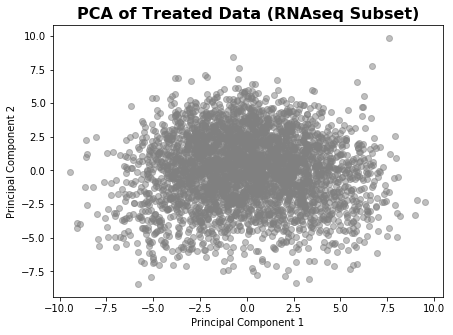

In [231]:
# Plot normalized data PCA for RNAseq subset genes
% matplotlib inline

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(norm_pca_subset_UT.explained_variance_ratio_))

dims = (7,5)

fig,ax = plt.subplots(figsize=dims)

plt.scatter(norm_sc_values_r_transform_subset_UT[:,0], norm_sc_values_r_transform_subset_UT[:,1],
            color = 'grey', alpha = 0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('PCA of Treated Data (RNAseq Subset)', fontsize = 16, weight = "bold")
plt.savefig('PCA_treated_RNAseqSubset_grey.pdf')

In [211]:
# Principal Component Analysis with T-SNE
norm_pca_reindex_10comp_subset_UT = PCA(n_components=10) # Copying 10x and ScanPy 
norm_sc_values_r_reindex_10comp_subset_UT = norm_pca_reindex_10comp_subset_UT.fit(sc_data_UU_norm_reindex_subset)
norm_sc_values_r_transform_reindex_10comp_subset_UT = norm_pca_reindex_10comp_subset_UT.fit(sc_data_UT_norm_reindex_subset).transform(sc_data_UT_norm_reindex_subset)

perplexities = [5,10,15,20,25,30,35,40,45,50]

print 'Treated Data'

tsne_norm_reindex_10comp_diffperp_subset_results_UT = []
for perp in perplexities:
    time_start = time.time()
    tsne_norm_reindex_10comp_diffperp_subset_UT = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=1000, n_jobs=8)
    tsne_norm_reindex_10comp_diffperp_subset_results_UT.append(tsne_norm_reindex_10comp_diffperp_subset_UT.fit_transform(norm_sc_values_r_transform_reindex_10comp_subset_UT))
    print perp
    print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)
    
print 'Treated T-SNE Done!'

Treated Data
5
t-SNE done! Time elapsed: 20.1010289192 seconds
10
t-SNE done! Time elapsed: 21.1958298683 seconds
15
t-SNE done! Time elapsed: 18.3053429127 seconds
20
t-SNE done! Time elapsed: 22.9785580635 seconds
25
t-SNE done! Time elapsed: 24.0741140842 seconds
30
t-SNE done! Time elapsed: 24.0356669426 seconds
35
t-SNE done! Time elapsed: 24.8286249638 seconds
40
t-SNE done! Time elapsed: 25.6736810207 seconds
45
t-SNE done! Time elapsed: 24.8299181461 seconds
50
t-SNE done! Time elapsed: 26.1062541008 seconds
Treated T-SNE Done!


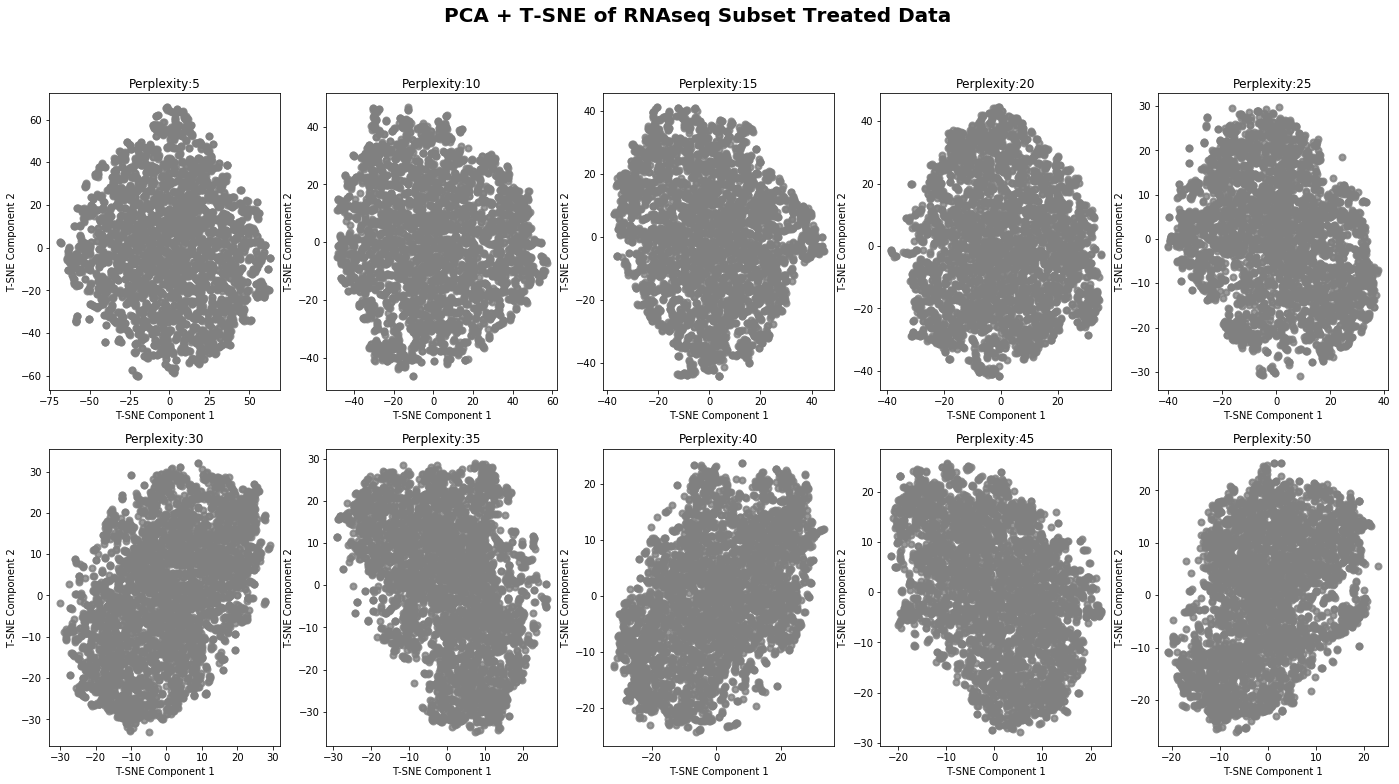

In [212]:
fig = plt.figure(figsize = (24,12))
fig.suptitle("PCA + T-SNE of RNAseq Subset Treated Data", fontsize = 20, weight = "bold")
for p in range(len(tsne_norm_reindex_10comp_diffperp_subset_results_UT)):
    ax = fig.add_subplot(2,5,p+1)
    ax.set_title("Perplexity:" + str(perplexities[p]))
    ax.set_xlabel("T-SNE Component 1")
    ax.set_ylabel("T-SNE Component 2")
    plt.scatter(tsne_norm_reindex_10comp_diffperp_subset_results_UT[p][:,0], 
                tsne_norm_reindex_10comp_diffperp_subset_results_UT[p][:,1], 
                color='grey', alpha=0.8, lw=2)

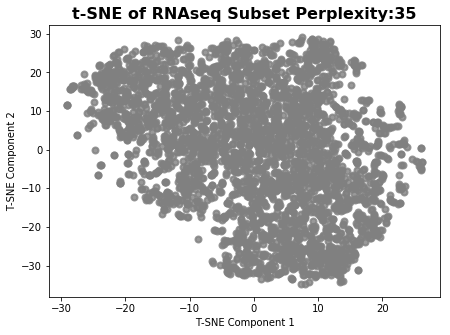

In [233]:
fig = plt.figure(figsize = (7,5))
p=6
plt.scatter(tsne_norm_reindex_10comp_diffperp_subset_results_UT[p][:,0], 
            tsne_norm_reindex_10comp_diffperp_subset_results_UT[p][:,1], 
            color='grey', alpha=0.8, lw=2)
plt.title("t-SNE of RNAseq Subset Perplexity:" + str(perplexities[p]),fontsize = 16, weight = "bold")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.savefig('tSNE_treated_RNAseqSubset_grey.pdf')

In [ ]:
### NEXT STEPS ###
# 1. Find/see where subclone signatures fall on dimensionality reduced plots (can we ID? what are the axes?)
# 2. 

In [217]:
sc_lineage_data_UU['Barcode'].count()


2865

In [218]:
len(sc_lineage_data_UU)


2886

In [219]:
sc_lineage_data_UT['Barcode'].count()


3504

In [220]:
len(sc_lineage_data_UT)


3524

In [225]:
sc_lineage_data_UT.tail(50)

,Unnamed: 0,Transcript ID,Barcode,Cell Barcode,UMI,DDX11L1,WASH7P,MIR6859-2,MIR6859-1,FAM138A,...,DAZ4,DAZ3,DAZ2,TTTY3B,TTTY3,CDY1B,CDY1,CSPG4P1Y,GOLGA2P3Y,GOLGA2P2Y
3474,3474,A00252:38:HF2JNDMXX:2:2338:30590:4711,CTGAGAGTCAGTGAGTCTCT,ATCTGCCGTTCCACGG,TAATAAGGAA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,3475,A00252:38:HF2JNDMXX:2:2344:3450:36057,CTGAGAGTGAGTCTGTCAGT,GCTGGGTAGCCGATTT,CCGCTCGCCA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,3476,A00252:38:HF2JNDMXX:2:2368:14488:25394,CTGACAGACACTCTCAGTCT,CATATTCCACTGTTAG,AAGGTTTAGT,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,3477,A00252:38:HF2JNDMXX:2:2387:4734:2425,CTGACTGAGAGTCACACTCT,TTGCCGTCACCCAGTG,AAGAGGTAGA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3478,3478,A00252:38:HF2JNDMXX:2:2416:30535:31548,CTGACTGAGAGACTGAGACA,TCATTACTCGATGAGG,TTGTATGGTT,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3479,3479,A00252:38:HF2JNDMXX:2:2486:1579:29935,CTGAGAGACTCTGTGACTGA,GCTGGGTGTAAGAGGA,CGTTTTTGTA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3480,3480,A00252:38:HF2JNDMXX:2:1101:15049:9925,CTGAGTCACTGACTCTGACT,AGTAGTCTCACGCATA,CCCGCACCAT,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3481,3481,A00252:38:HF2JNDMXX:2:1115:21007:1016,CTGAGTGAGAGAGTGACGA,ACACCAAGTCCCTACT,TAATCCCCGT,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3482,3482,A00252:38:HF2JNDMXX:2:1174:13657:7921,CTGAGTGTGAGTCTGTGACA,AACCATGGTTGCGTTA,GGTAGGTCTC,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3483,3483,A00252:38:HF2JNDMXX:2:1205:3965:12211,CTGAGAGTGACAGACTCAGT,TGACTAGAGTACCGGA,CATCATGGAC,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
